In [357]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [358]:
r,phi,z,data = athena_read.vtk('disk.block0.out1.00300.vtk')
disk = athena_read.hst('disk.hst')
density = data.get('dens')
time = disk.get('time')[300]

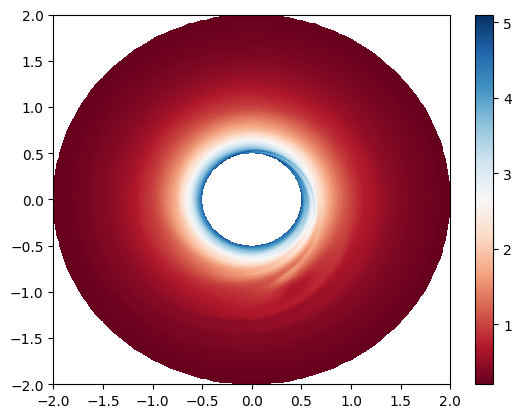

In [359]:
'''Plot 2-D surface density mesh plot, Conversion from Polar -> Cartesian'''
x = r[None,:] * np.cos(phi[:,None])
y = r[None,:] * np.sin(phi[:, None])
plt.pcolormesh(x,y, density[0], cmap='RdBu')
plt.colorbar()

In [360]:
'''Find mid-point values of each mesh cell'''
r_mid = np.array([])
phi_mid = np.array([])

for i in range(len(r)):
    if i < 192:
        r_mid = np.append(r_mid, ((r[i] + r[i+1])/2))

for j in range(len(phi)):
    if j < 192:
        phi_mid = np.append(phi_mid, ((phi[j] + phi[j+1])/2))

In [361]:
'''Find the distance between planet and arbitrary mesh cell'''
rp = 1.0
gm = 1.0
gm_planet = 0.00000954588
period = 2*np.pi*np.sqrt(rp**3 / 1.0)
phip = 2 * (np.pi / period)*time
d= np.sqrt(rp**2 + r1[None,:]**2 - 2*rp*r1[None,:]*np.cos(phip - phi1[:,None]))


In [362]:
'''Calculate gravitational acceleration given a smoothing function'''
g = (gm_planet/ (d**2))

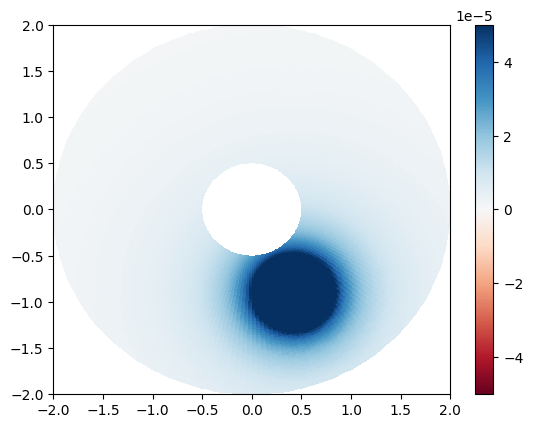

In [363]:
'''Plot gravitational acceleration mesh plot in x and y-direction'''
plt.pcolormesh(x,y, g, cmap = 'RdBu', vmin=-0.00005, vmax= 0.00005)
plt.colorbar()